# Import Library

In [85]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Content-based filtering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Optional
import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [86]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"davinghani","key":"7ff663671308ed5efa251599e7c86b5c"}'}

In [87]:
# Buat folder untuk menyimpan kredensial
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d devdope/200k-spotify-songs-light-dataset

# Ekstrak file ZIP
!unzip 200k-spotify-songs-light-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/devdope/200k-spotify-songs-light-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
200k-spotify-songs-light-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  200k-spotify-songs-light-dataset.zip
replace light_spotify_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [88]:
# Load CSV
df = pd.read_csv("light_spotify_dataset.csv")

# Tampilkan 5 baris pertama
df.head()

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0


- Mengunggah file kredensial kaggle.json ke Google Colab untuk akses dataset Kaggle.

- Membuat folder khusus .kaggle dan mengatur izin akses file kredensial agar aman.

- Mengunduh dataset Spotify dari Kaggle menggunakan perintah CLI kaggle datasets download.

- Mengekstrak file ZIP dataset agar file CSV dapat diakses.

- Memuat dataset CSV ke dalam DataFrame pandas untuk analisis dan pemodelan.

- Menampilkan contoh data awal untuk memastikan data berhasil dimuat dan memahami struktur dataset.

# Data Prepocessing

## Lihat Ringkasan Dataset

In [89]:
print("Ukuran data:", df.shape)
df.info()

Ukuran data: (236988, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236988 entries, 0 to 236987
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            236988 non-null  object 
 1   song              236980 non-null  object 
 2   emotion           236988 non-null  object 
 3   variance          236988 non-null  float64
 4   Genre             236988 non-null  object 
 5   Release Date      236988 non-null  int64  
 6   Key               236988 non-null  object 
 7   Tempo             236988 non-null  int64  
 8   Loudness          236988 non-null  float64
 9   Explicit          236988 non-null  object 
 10  Popularity        236988 non-null  int64  
 11  Energy            236988 non-null  int64  
 12  Danceability      236988 non-null  int64  
 13  Positiveness      236988 non-null  int64  
 14  Speechiness       236988 non-null  int64  
 15  Liveness          236988 non-null  int64  

Dataset yang digunakan terdiri dari 236.988 baris dan 18 kolom, mencakup berbagai fitur terkait lagu seperti nama artis, judul lagu, emosi, genre, dan atribut audio numerik seperti tempo dan loudness. Terdapat beberapa tipe data termasuk objek untuk fitur kategorik dan numerik seperti float dan integer. Dataset ini lengkap dengan jumlah data non-null yang tinggi pada hampir semua kolom, serta ukuran memori yang digunakan sekitar 32,5 MB, menunjukkan kesiapan data untuk analisis dan pemodelan lebih lanjut.

## Cek Missing Values

In [90]:
# Total missing value per kolom
df.isnull().sum()

,0
artist,0
song,8
emotion,0
variance,0
Genre,0
Release Date,0
Key,0
Tempo,0
Loudness,0
Explicit,0


In [91]:
# Cek dulu jumlah awal
print("Jumlah baris sebelum:", df.shape[0])

# Drop baris dengan song kosong
df = df.dropna(subset=['song'])

# Cek ulang
print("Jumlah baris setelah:", df.shape[0])

Jumlah baris sebelum: 236988
Jumlah baris setelah: 236980


Dataset awal memiliki 236.988 baris dengan 8 baris yang memiliki nilai kosong pada kolom song. Untuk memastikan kualitas data, baris-baris tersebut dihapus sehingga jumlah data menjadi 236.980 baris.

## Ringkasan Statistik Fitur Numerik

In [92]:
df.describe()

,variance,Release Date,Tempo,Loudness,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
count,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000,236980.000000
mean,0.658926,2008.472660,120.610136,-8.038625,40.003945,62.369052,59.127580,47.657477,11.748042,19.905169,26.156452,5.439826
std,0.320739,14.756225,28.966093,3.842138,18.769654,22.083187,17.069299,23.801892,12.443690,16.550772,29.047176,17.662252
min,-1.000000,1900.000000,33.000000,-46.770000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,0.833514,2002.000000,97.000000,-9.890000,27.000000,48.000000,48.000000,29.000000,4.000000,10.000000,2.000000,0.000000
50%,0.833514,2015.000000,120.000000,-7.190000,39.000000,64.000000,60.000000,47.000000,6.000000,13.000000,14.000000,0.000000
75%,0.833514,2019.000000,140.000000,-5.370000,52.000000,80.000000,72.000000,66.000000,16.000000,25.000000,44.000000,0.000000
max,1.000000,2024.000000,200.000000,3.740000,100.000000,100.000000,99.000000,99.000000,97.000000,100.000000,100.000000,100.000000


Ringkasan statistik pada fitur numerik menunjukkan distribusi data dari 236.980 lagu. Rata-rata tempo lagu sekitar 120 BPM dengan rentang dari 33 hingga 200 BPM. Loudness berkisar dari -46,77 dB hingga 3,74 dB dengan rata-rata sekitar -8 dB, mencerminkan variasi tingkat suara. Popularitas rata-rata lagu berada di angka 40 dengan nilai maksimal 100. Fitur-fitur seperti energy, danceability, positiveness, speechiness, liveness, acousticness, dan instrumentalness memiliki rentang nilai 0 hingga 100 dengan rata-rata yang bervariasi, menggambarkan karakteristik musikal yang beragam dalam dataset ini.

## Memisahkan Fitur Kategorik dan Numerik

In [93]:
# Categorical Features
categorical_cols = ['artist', 'song', 'emotion', 'Genre', 'Release Date', 'Key', 'Explicit']

# Numerical Features
numerical_cols = ['variance', 'Tempo', 'Loudness', 'Popularity', 'Energy',
                  'Danceability', 'Positiveness', 'Speechiness',
                  'Liveness', 'Acousticness', 'Instrumentalness']


### Distribusi Fitur Numerik

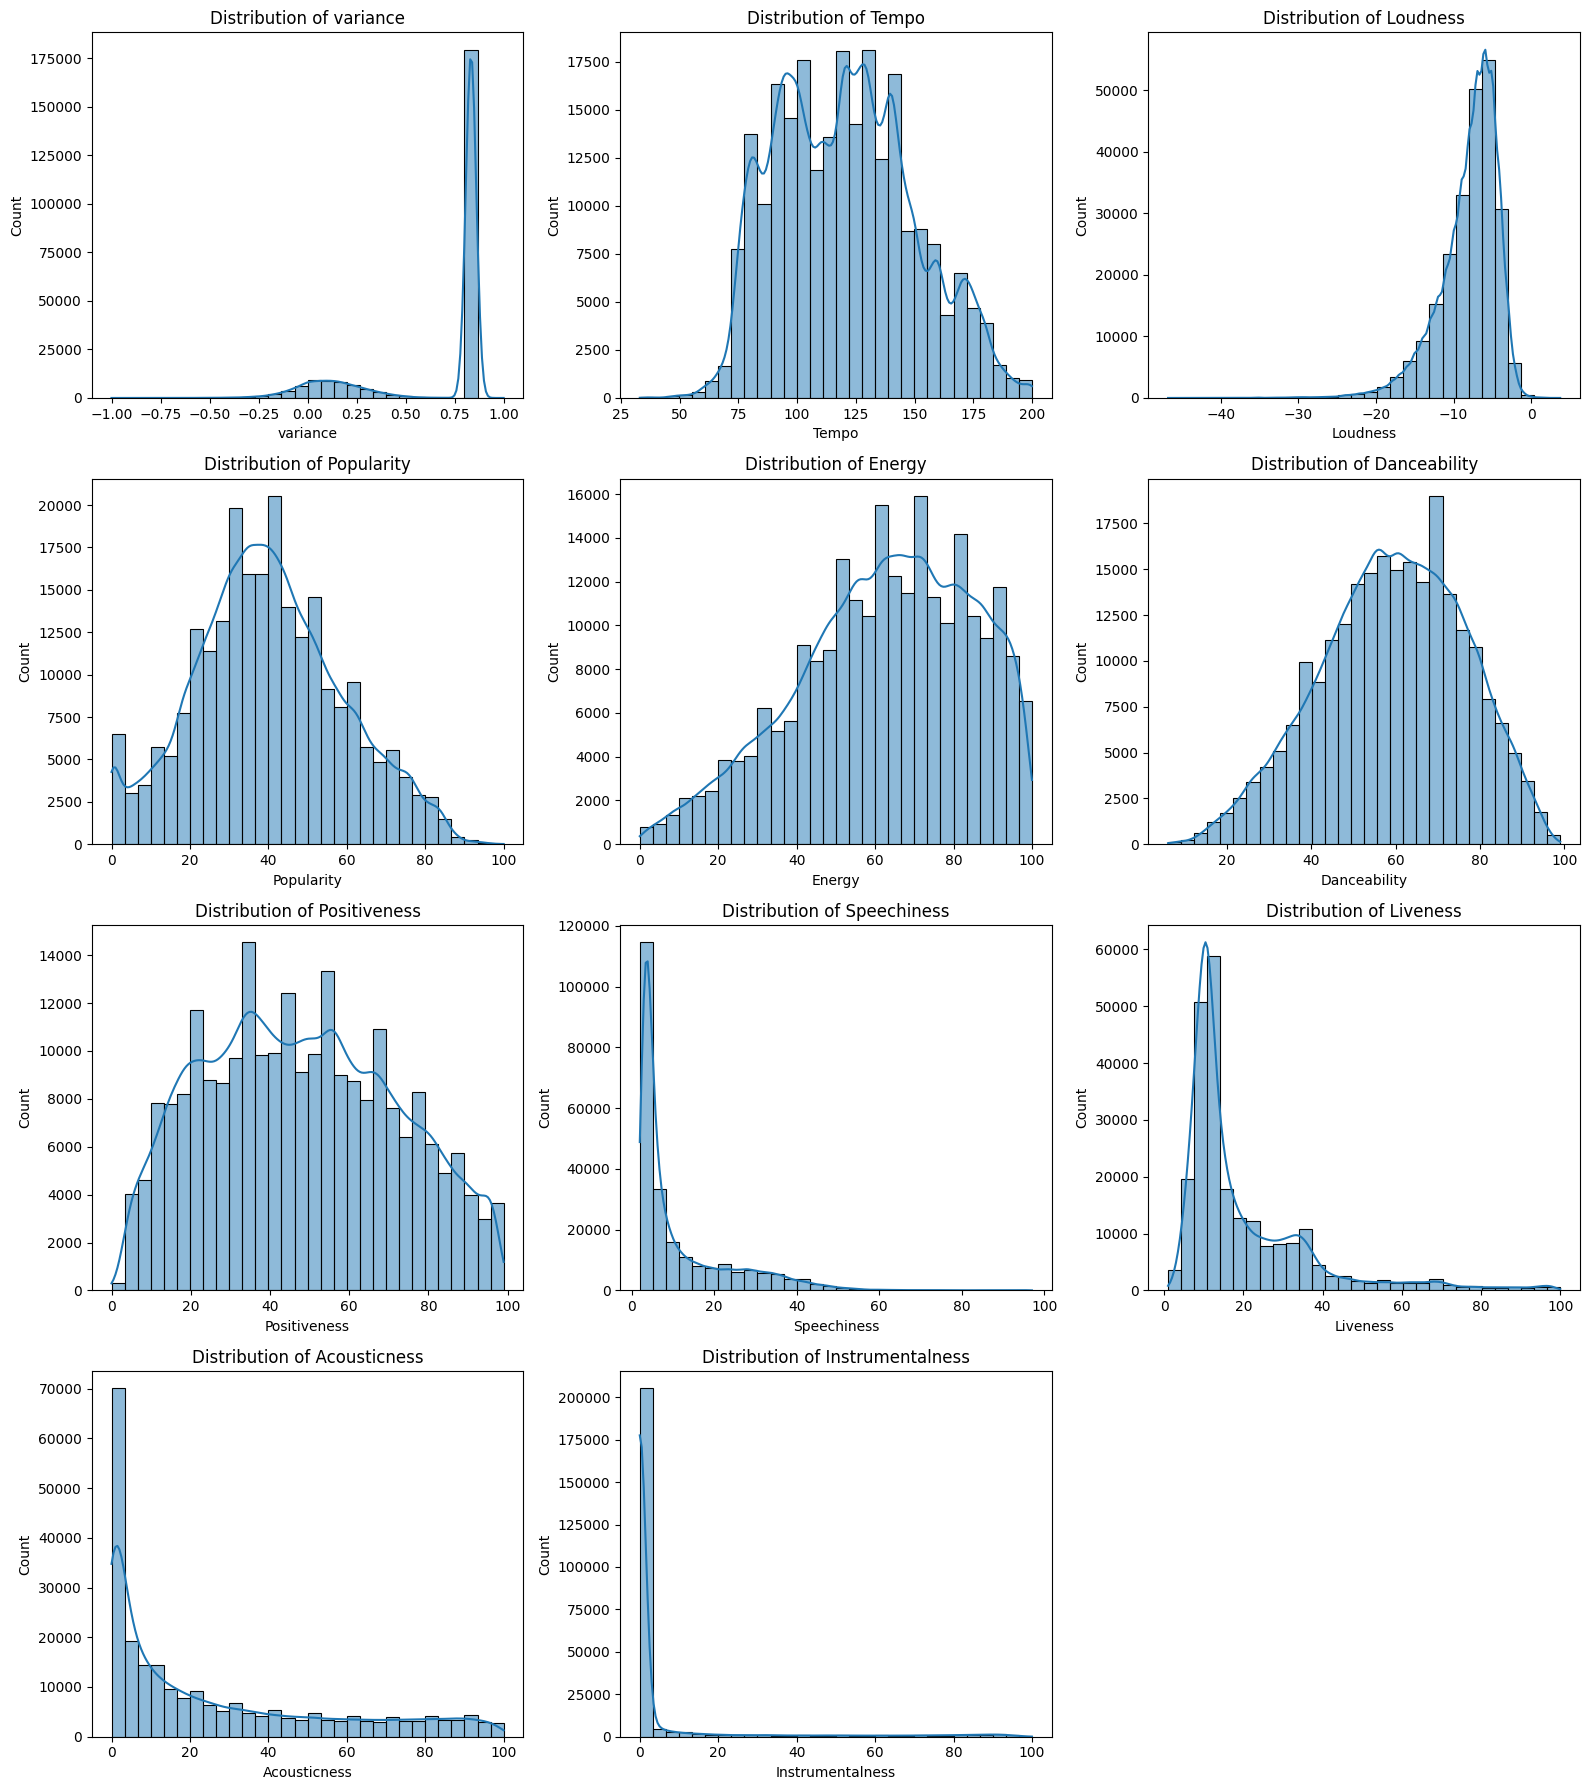

In [94]:
plt.figure(figsize=(16, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

a. Variance
- Nilai variance berkumpul di sekitar 1 dan -1.
- Indikasi bahwa sebagian besar data sangat variatif atau sangat konstan.

b. Tempo
- Distribusi tempo menyerupai bentuk normal.
- Tempo umumnya berkisar antara 80–150 BPM, pusat di sekitar 120 BPM (tipikal musik populer).

c. Loudness
- Banyak lagu memiliki loudness mendekati 0 (kemungkinan ini dalam skala dBFS).
- Distribusi miring ke kiri → banyak lagu yang lebih lembut dibanding sangat keras.

d. Popularity
- Distribusi miring ke kanan → banyak lagu tidak terlalu populer.
- Hanya sebagian kecil lagu yang punya nilai popularitas tinggi.

e. Energy
- Cenderung merata dari 20–100, puncak di sekitar 60–80.
- Musik dalam dataset cenderung memiliki tingkat energi sedang ke tinggi.

f. Danceability
- Terdistribusi normal dengan puncak sekitar 60–80.
- Menunjukkan banyak lagu cukup mudah untuk ditarikan.

g. Positiveness
- Distribusi cukup merata, sedikit puncak di sekitar nilai 40–60.
- Beragam lagu dari nuansa sedih hingga ceria.

h. Speechiness
- Mayoritas lagu memiliki nilai rendah (0–10), sedikit yang tinggi.
- Menunjukkan sebagian besar lagu adalah nyanyian, bukan spoken word.

i. Liveness
- Mayoritas lagu memiliki nilai rendah → menunjukkan sebagian besar direkam di studio, bukan live.

j. Acousticness
- Mirip speechiness dan liveness, didominasi nilai rendah.
- Banyak lagu cenderung elektronik atau digital, bukan akustik.

k. Instrumentalness
- Skewed ekstrim ke kiri → sebagian besar lagu memiliki vokal.
- Sedikit lagu yang benar-benar instrumental.

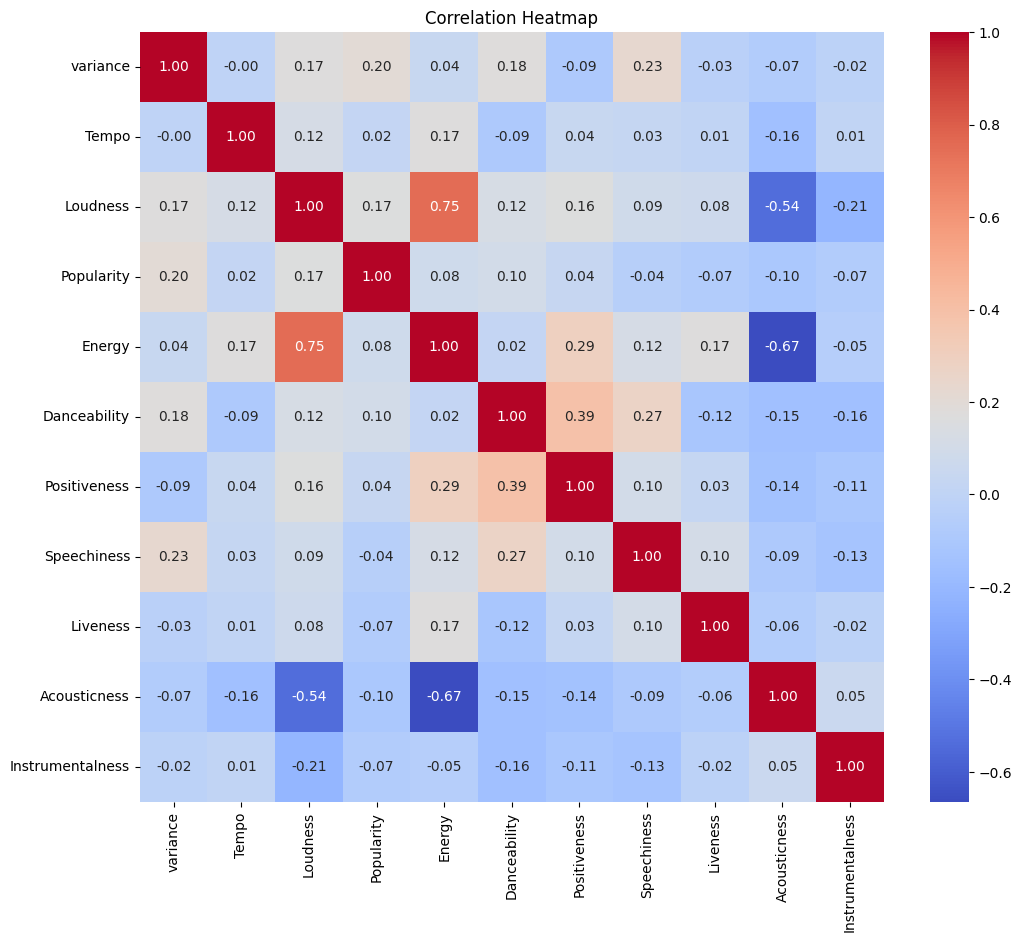

In [95]:
plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Menampilkan korelasi antar fitur numerik:

1. Korelasi tinggi:

 - Energy vs Loudness: +0.75 → semakin keras, semakin energik.
 - Energy vs Acousticness: -0.67 → lagu akustik cenderung rendah energi.

2. Korelasi sedang:

 - Danceability vs Positiveness: +0.39
 - Speechiness vs Danceability: +0.27

3. Korelasi lemah terhadap Popularity → menunjukkan Popularity tidak terlalu tergantung fitur teknis seperti Energy, Danceability, dll.

4. Variance hampir tidak berkorelasi dengan fitur lain (hampir 0 semua).

### Distribusi Fitur Kategorik

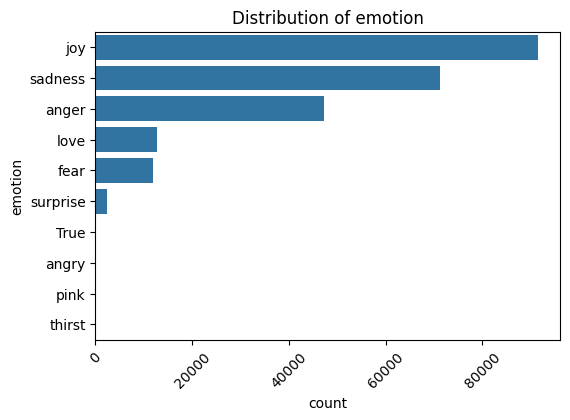

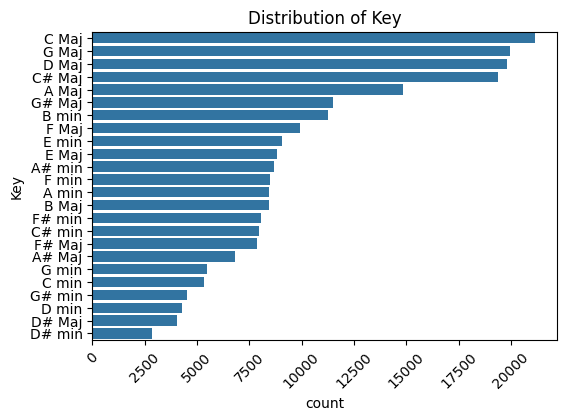

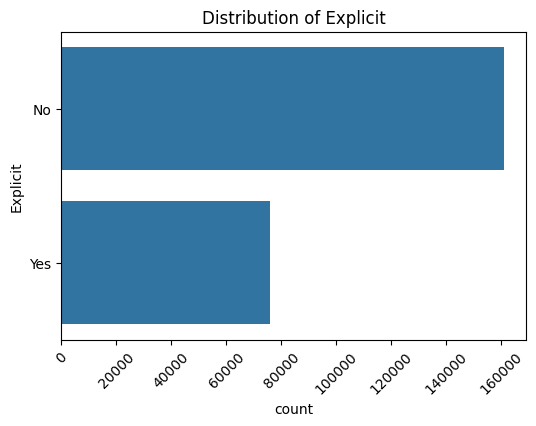

In [96]:
for col in ['emotion', 'Key', 'Explicit']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

1. Distribusi Emotion (Emosi Lirik Lagu)
 - Emosi dominan adalah joy (kebahagiaan), diikuti oleh sadness (kesedihan) dan anger (kemarahan).
 - Terdapat label-label tidak relevan seperti "True", "angry" (kemungkinan duplikat dari "anger"), "pink", dan "thirst" yang tampaknya merupakan noise atau label error.

2. Distribusi Key (Tangga Nada Lagu)
 - Tangga nada C Maj, G Maj, dan D Maj merupakan yang paling umum digunakan.
 - Nada mayor (Maj) lebih dominan dibandingkan nada minor (min).
 - Tangga nada seperti D# min, D# Maj, dan G# min adalah yang paling jarang muncul.

3. Distribusi Explicit (Konten Eksplisit)
 - Lagu dengan label "No" (tidak eksplisit) jauh lebih banyak dibandingkan dengan yang "Yes" (eksplisit).
 - Artinya, mayoritas lagu dalam dataset cenderung tidak mengandung kata-kata atau tema eksplisit.

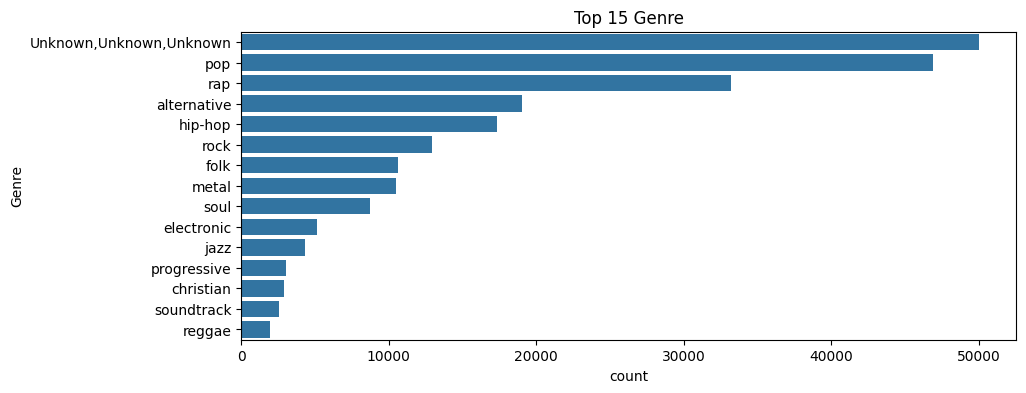

In [97]:
# Genre
plt.figure(figsize=(10,4))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index[:15])
plt.title("Top 15 Genre")
plt.show()

Menampilkan 15 genre teratas berdasarkan jumlah:

- Genre terbanyak adalah "Unknown,Unknown,Unknown", artinya banyak entri tidak memiliki label genre yang benar atau tidak diketahui.

- Genre populer lainnya:

 - Pop (paling dominan setelah Unknown)

 - Rap, Alternative, Hip-hop, Rock

Ini menunjukkan dataset sangat berfokus pada genre musik populer dan kontemporer.

# Modelling

In [98]:
# Ambil sample 20000 data (random seed agar reproducible)
df_small = df.sample(20000, random_state=42).reset_index(drop=True)

# Buang duplikat judul lagu supaya unik (ambil baris pertama)
df_unique = df_small.drop_duplicates(subset=['song']).reset_index(drop=True)

In [99]:
df_unique['combined_features'] = df_unique['Genre'].fillna('') + ' ' + \
                                 df_unique['emotion'].fillna('') + ' ' + \
                                 df_unique['Key'].astype(str) + ' ' + \
                                 df_unique['Explicit'].astype(str)

print(df_unique['combined_features'].head(), '\n')


0    Unknown,Unknown,Unknown joy F# Maj No
1                    hip-hop joy E min Yes
2                     pop sadness D Maj No
3     Unknown,Unknown,Unknown joy A Maj No
4                alternative love G Maj No
Name: combined_features, dtype: object 



Pada tahap pemodelan, dilakukan pengambilan sampel sebanyak 20.000 data secara acak untuk memastikan proses komputasi tetap efisien dan hasil dapat direproduksi dengan menggunakan random seed. Selanjutnya, duplikat berdasarkan judul lagu dihapus agar setiap lagu memiliki judul unik, yang memudahkan pengelolaan indeks dalam sistem rekomendasi. Fitur kategorik utama seperti genre, emosi, kunci musik, dan label eksplisit digabungkan menjadi satu string sebagai representasi fitur gabungan. Ini akan menjadi dasar untuk proses transformasi fitur selanjutnya, seperti vectorisasi menggunakan TF-IDF. Output contoh beberapa nilai combined_features menunjukkan penggabungan atribut kategori yang akan digunakan untuk membangun model rekomendasi.

## TF-IDF Vectorizer untuk Fitur Kategorik

In [100]:
tfidf = TfidfVectorizer(stop_words='english', max_features=20000)
tfidf_matrix = tfidf.fit_transform(df_unique['combined_features'])

print("Ukuran TF-IDF matrix:", tfidf_matrix.shape)

Ukuran TF-IDF matrix: (17977, 538)


Pada tahap ini, fitur kategorik yang telah digabungkan dalam kolom combined_features diubah menjadi representasi numerik menggunakan TF-IDF Vectorizer. TF-IDF membantu memberikan bobot pada setiap kata berdasarkan frekuensi kemunculannya dan pentingnya kata tersebut dalam konteks seluruh dataset, sehingga fitur teks dapat digunakan secara efektif dalam perhitungan kemiripan. Dengan batas maksimal 20.000 fitur yang diambil, hasil transformasi membentuk matriks berdimensi 17.977 baris (jumlah lagu unik) dan 538 kolom (fitur kata unik), siap digunakan untuk tahap perhitungan kemiripan antar lagu.

## Scaler Fitur Numerik

In [101]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df_unique[numerical_cols])

## Gabung TF-IDF dan Numerik

In [102]:
from scipy.sparse import hstack

combined_matrix = hstack([tfidf_matrix, numerical_scaled])
print("\nUkuran matrix gabungan:", combined_matrix.shape)


Ukuran matrix gabungan: (17977, 549)


Pada tahap ini, fitur numerik seperti tempo, energy, dan danceability diskalakan menggunakan MinMaxScaler agar semua nilai fitur berada dalam rentang 0 sampai 1. Normalisasi ini penting untuk memastikan bahwa fitur numerik memiliki skala yang seimbang dan tidak mendominasi perhitungan kemiripan dibandingkan fitur TF-IDF. Selanjutnya, matriks TF-IDF yang merepresentasikan fitur kategorik dan matriks fitur numerik yang sudah diskalakan digabungkan secara horizontal menggunakan fungsi hstack dari SciPy, menghasilkan matriks gabungan dengan 17.977 baris dan 549 kolom fitur yang siap digunakan untuk menghitung kemiripan antar lagu.

## Hitung Cosine Similarity

In [103]:
cosine_sim = cosine_similarity(combined_matrix, combined_matrix)

In [104]:
print("\nContoh cosine similarity baris 0:")
print(cosine_sim[0][:10])


Contoh cosine similarity baris 0:
[1.         0.74852711 0.76415353 0.92562362 0.68601745 0.71095985
 0.77069074 0.70496784 0.76405244 0.73359545]


Pada tahap ini, dilakukan perhitungan cosine similarity antara semua pasangan lagu berdasarkan matriks fitur gabungan yang telah dibuat. Cosine similarity mengukur sejauh mana dua vektor fitur mirip satu sama lain, dengan nilai 1 menunjukkan kemiripan sempurna dan 0 menunjukkan tidak ada kemiripan. Output yang ditampilkan merupakan contoh nilai cosine similarity dari lagu pada baris pertama terhadap 10 lagu lainnya, menunjukkan tingkat kemiripan yang bervariasi antara lagu-lagu dalam dataset. Nilai ini akan menjadi dasar dalam sistem rekomendasi untuk menemukan lagu-lagu yang paling mirip dengan input pengguna.

# Rekomendasi Lagu

In [105]:
# Buat Indeks Judul Lagu Unik
indices_unique = pd.Series(df_unique.index, index=df_unique['song'].str.lower())

# Fungsi Recomend
def recommend(song_title, n_recommendations=5):
    song_title = song_title.lower()
    if song_title not in indices_unique:
        return f"Lagu '{song_title}' tidak ditemukan di dataset subset unik."

    idx = indices_unique[song_title]
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil lebih banyak dari n_recommendations untuk antisipasi filter
    top_scores = sim_scores[1: n_recommendations*2]

    # Filter hanya indeks valid yang masih dalam range df_unique
    max_idx = df_unique.shape[0] - 1
    filtered_scores = [s for s in top_scores if 0 <= s[0] <= max_idx]

    # Ambil n rekomendasi pertama setelah filter
    sim_scores = filtered_scores[:n_recommendations]

    song_indices = [i[0] for i in sim_scores]
    rec_df = df_unique[['artist', 'song', 'Genre', 'emotion']].iloc[song_indices]
    rec_df = rec_df.reset_index(drop=True)
    rec_df.index += 1

    scores = [round(sim_scores[i][1], 3) for i in range(len(sim_scores))]
    rec_df['Similarity'] = scores
    return rec_df




Bagian kode ini bertugas membuat fungsi rekomendasi lagu berdasarkan input judul lagu pengguna. Pertama, dibuat indeks khusus yang menghubungkan judul lagu unik ke posisi baris dalam dataset agar pencarian cepat dan akurat. Fungsi recommend kemudian menerima judul lagu sebagai input dan melakukan pencarian indeks lagu tersebut. Selanjutnya, fungsi menghitung skor kemiripan cosine antara lagu input dan semua lagu lain, lalu mengurutkan skor tersebut secara menurun. Untuk memastikan hasil valid, fungsi menyaring skor yang berada dalam rentang indeks dataset. Akhirnya, fungsi mengembalikan daftar rekomendasi sejumlah n_recommendations berupa informasi artis, judul lagu, genre, emosi, serta skor kemiripan, yang diformat rapi dengan nomor urut. Fungsi ini menjadi inti dari sistem rekomendasi content-based filtering.

In [106]:
# Lihat 60 Judul Lagu
print(df_unique['song'].head(60))


0                         Lay It On Me
1                              Help Me
2         The First Cut Is the Deepest
3                 Touch of Heaven Live
4                           Banana Co.
5       Colored Dreams / Killers Pt. 2
6                         Hippopotamus
7                         Little Honda
8                         Second Death
9                      With You Around
10               When Big Joan Sets Up
11                Ill Mind of Hopsin 9
12                       Die a Gangsta
13                           Bad Bitch
14                       Low Tide Love
15             See You Later Alligator
16                            Kid Cudi
17                               Emily
18                        Shake Em Off
19                      The Right Song
20                  Walk In Wit the Mo
21                             Tune In
22                   Some Kind Of Love
23                         Golden Love
24                    Praying For Time
25                   Save

In [107]:
def recommend_interactive():
    song_title = input("Masukkan judul lagu: ").strip()
    song_title_lower = song_title.lower()

    if song_title_lower not in indices_unique:
        print(f"Lagu '{song_title}' tidak ditemukan di dataset subset unik.")
        return

    idx = indices_unique[song_title_lower]
    artist_name = df_unique.loc[idx, 'artist']

    print(f"\nLagu yang dicari: '{song_title}' oleh artis: {artist_name}")

    result = recommend(song_title, n_recommendations=5)
    display(result)


# Panggil fungsi
recommend_interactive()




Masukkan judul lagu: Baby

Lagu yang dicari: 'Baby' oleh artis: Justin Bieber


,artist,song,Genre,emotion,Similarity
1,Backstreet Boys,All In This Together,pop,joy,0.984
2,Ace Of Base,Life Is A Flower,pop,joy,0.983
3,Vonda Shepard,Read Your Mind,pop,joy,0.983
4,Backstreet Boys,Forces Of Nature,pop,joy,0.982
5,Lady Gaga,Just Dance,pop,joy,0.980


Fungsi recommend_interactive memungkinkan pengguna memasukkan judul lagu secara manual. Setelah menerima input, fungsi memeriksa keberadaan lagu dalam dataset, menampilkan nama artis lagu tersebut, lalu menampilkan daftar rekomendasi lima lagu teratas yang paling mirip berdasarkan fitur musik. Hasil rekomendasi ditampilkan dengan informasi lengkap seperti artis, judul lagu, genre, emosi, dan skor kemiripan, sehingga pengguna mendapatkan pengalaman interaktif yang informatif dan mudah digunakan.









# Evaluasi Metrik

In [108]:
def precision_at_k(song_title, k=5):
    song_title_lower = song_title.lower()

    if song_title_lower not in indices_unique:
        return f"Lagu '{song_title}' tidak ditemukan di dataset subset unik."

    idx = indices_unique[song_title_lower]

    # Pastikan idx adalah integer
    if isinstance(idx, (list, np.ndarray, pd.Series)):
        idx = idx[0]

    input_genre = df_unique.loc[idx, 'Genre']

    recs = recommend(song_title, n_recommendations=k)
    if isinstance(recs, str):  # jika error message
        return recs

    # Bandingkan genre secara elemen (pastikan genre rekomendasi juga scalar/string)
    relevant = recs['Genre'].reset_index(drop=True) == input_genre
    precision = relevant.sum() / k
    return precision


In [109]:
def recall_at_k(song_title, k=5):
    song_title_lower = song_title.lower()

    if song_title_lower not in indices_unique:
        return f"Lagu '{song_title}' tidak ditemukan di dataset subset unik."

    idx = indices_unique[song_title_lower]

    # Pastikan idx integer
    if isinstance(idx, (list, np.ndarray, pd.Series)):
        idx = idx[0]

    input_genre = df_unique.loc[idx, 'Genre']

    recs = recommend(song_title, n_recommendations=k)
    if isinstance(recs, str):  # error message
        return recs

    # Total lagu dengan genre sama di dataset unik (sebagai ground truth)
    total_relevant = (df_unique['Genre'] == input_genre).sum()

    # Hitung lagu relevan di rekomendasi
    relevant_in_rec = (recs['Genre'].reset_index(drop=True) == input_genre).sum()

    recall = relevant_in_rec / total_relevant if total_relevant > 0 else 0
    return recall


In [110]:
song_test = df_unique['song'].iloc[0]
print(f"Precision@20 untuk lagu '{song_test}': {precision_at_k(song_test, k=20):.2f}")
print(f"Recall@20 untuk lagu '{song_test}': {recall_at_k(song_test, k=20):.2f}")


Precision@20 untuk lagu 'Lay It On Me': 1.00
Recall@20 untuk lagu 'Lay It On Me': 0.01


Pada bagian evaluasi metrik, fungsi precision_at_k dan recall_at_k digunakan untuk mengukur kualitas rekomendasi berdasarkan genre lagu. Fungsi precision_at_k menghitung proporsi lagu dalam rekomendasi top-K yang memiliki genre sama dengan lagu input, menunjukkan tingkat relevansi rekomendasi. Fungsi recall_at_k mengukur proporsi lagu relevan yang berhasil direkomendasikan dari keseluruhan lagu dengan genre yang sama di dataset, menggambarkan seberapa lengkap rekomendasi tersebut.

Pada contoh lagu 'Lay It On Me', Precision@20 sebesar 1.00 menandakan semua 20 lagu rekomendasi sesuai genre, sementara Recall@20 sebesar 0.01 menunjukkan hanya sebagian kecil dari seluruh lagu relevan yang tercover dalam rekomendasi, yang wajar mengingat jumlah lagu relevan jauh lebih banyak dibanding jumlah rekomendasi yang dibatasi.